## Frequentist example
https://medium.com/@bragadeeshs/performing-a-b-testing-in-python-a-real-world-use-case-ccb5c5e67cdc

https://medium.com/towards-data-science/a-b-testing-a-complete-guide-to-statistical-testing-e3f1db140499

In [1]:
import numpy as np
from scipy import stats

# Simulated data for the control group (Group A)
control_group = np.random.normal(loc=25, scale=5, size=1000)

# Simulated data for the treatment group (Group B)
treatment_group = np.random.normal(loc=30, scale=5, size=1000)

# Calculate sample means for both groups
mean_control = np.mean(control_group)
mean_treatment = np.mean(treatment_group)

In [ ]:
t_shapiro_control, p_shapiro_control = stats.shapiro(control_group)
if p_shapiro_control > 0.05:
    print(f"With a {p_shapiro_control:.2f} control, we fail to reject the null hypothesis i.e. We do not have sufficient evidence to not say that sample comes from a normal distribution.")

t_shapiro_treatment, p_shapiro_treatment = stats.shapiro(treatment_group)
if p_shapiro_treatment > 0.05:
    print(f"With a {p_shapiro_treatment:.2f} treatment, we fail to reject the null hypothesis i.e. We do not have sufficient evidence to not say that sample comes from a normal distribution.")

With a 0.16 control, we fail to reject the null hypothesis i.e. We do not have sufficient evidence to say that sample comes from a normal distribution.
With a 0.71 treatment, we fail to reject the null hypothesis i.e. We do not have sufficient evidence to say that sample comes from a normal distribution.


In [ ]:
# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.
# For samples from significantly non-normal populations, Levene’s test levene is more robust.
# A very small p-value suggests that the populations do not have equal variances.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

stat_bartlett, p_bartlett = stats.bartlett(control_group, treatment_group)
print(f"Bartlett's test statistic: {stat_bartlett:5f}, p-value: {p_bartlett:5f}")
if p_bartlett > 0.05:
    print("We fail to reject the Null. We say that the did not find evidence to say the difference between variances is statistically significant.")


Bartlett's test statistic: 0.726293, p-value: 0.394087
We fail to reject the Null. We say that the did not find evidence to say the difference between variances is statistically significant.


In [12]:
# Calculate sample standard deviations for both groups
std_control = np.std(control_group)
std_treatment = np.std(treatment_group)

print("Standard deviation of control group:", std_control, "Standard deviation of treatment group:", std_treatment)

# Perform a two-sample t-test
#t_stat, p_value = stats.ttest_ind(control_group, treatment_group, alternative='two-sided')
t_stat, p_value = stats.ttest_ind(control_group, treatment_group, alternative='less')

# Define significance level
alpha = 0.05

# Check if the difference is statistically significant
if p_value < alpha:
    print("T-test - The difference is statistically significant.")
else:
    print("T-test - The difference is not statistically significant.")

# Output the results
print(f"Control Group Mean: {mean_control:.2f}")
print(f"Treatment Group Mean: {mean_treatment:.2f}")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")


# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control_group, treatment_group, equal_var=False)

# Define significance level
alpha = 0.05

print()
# Check if the difference is statistically significant
if p_value < alpha:
    print("Welch's - The difference is statistically significant.")
else:
    print("Welch's - The difference is not statistically significant.")

# Output the results
print(f"Control Group Mean: {mean_control:.2f}")
print(f"Treatment Group Mean: {mean_treatment:.2f}")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

Standard deviation of control group: 4.963500523685477 Standard deviation of treatment group: 5.099196305247195
T-test - The difference is statistically significant.
Control Group Mean: 25.19
Treatment Group Mean: 30.44
T-Statistic: -23.361
P-Value: 0.000

Welch's - The difference is statistically significant.
Control Group Mean: 25.19
Treatment Group Mean: 30.44
T-Statistic: -23.361
P-Value: 0.000


In [15]:
import pandas as pd
control_df = pd.DataFrame(control_group, columns=['values'])
control_df['group'] = 'control'
treatment_df = pd.DataFrame(treatment_group, columns=['values'])
treatment_df['group'] = 'treatment'

data = pd.concat([control_df, treatment_df], axis=0) 
data.head()

,values,group
0,25.452485,control
1,29.805568,control
2,26.122831,control
3,35.051302,control
4,28.832924,control


In [16]:
data.groupby('group').describe()

values                                                       \
            count      mean       std        min        25%        50%   
group                                                                    
control    1000.0  25.18520  4.965984  10.247945  21.886167  25.359271   
treatment  1000.0  30.44481  5.101748  12.593208  27.081622  30.623690   

                                 
                 75%        max  
group                            
control    28.581413  39.206374  
treatment  33.808985  47.342992

In [17]:
import plotly.express as px

fig = px.box(data, x="group", y="values", color = 'group', title = 'Boxplot of Control and Treatment Groups')
fig.show()

In [18]:
fig = px.histogram(data, x="values", y="values", color="group",marginal="box",  hover_data=data.columns) # box or violin, rug

x0_control = mean_control
x1_control = mean_control
x0_treatment = mean_treatment
x1_treatment = mean_treatment
fig.add_shape(type="line",x0=x0_control, x1=x0_control, y0 =0, y1=4500 , xref='x', yref='y', line = dict(color = 'blue', dash = 'dash', width = 5))
fig.add_shape(type="line",x0=x0_treatment, x1=x0_treatment, y0 =0, y1=4500 , xref='x', yref='y', line = dict(color = 'red', dash = 'dash', width = 5))
fig.show()

## Bayesian example
https://www.youtube.com/watch?v=nRLI_KbvZTQ

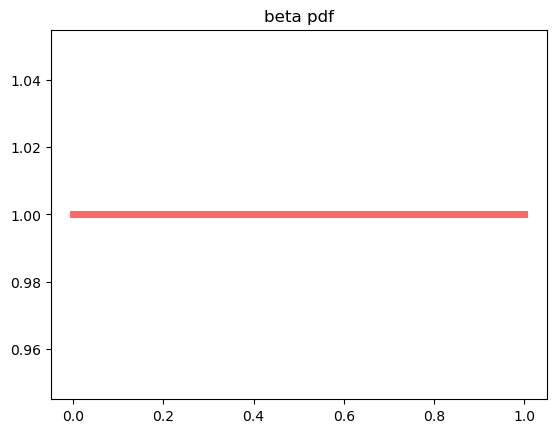

In [164]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

a, b = 1, 1
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)
plt.title('beta pdf')
plt.show()


In [166]:
total_tests = 1000
test_true_counter = 0
for i in range(total_tests):
    control_group = np.random.normal(loc=25, scale=5, size=1000)
    # Simulated data for the treatment group (Group B)
    treatment_group = np.random.normal(loc=30, scale=5, size=1000)

    # Calculate sample means for both groups
    mean_control = np.mean(control_group)
    mean_treatment = np.mean(treatment_group)
    difference_mean = abs(mean_control - mean_treatment)

    #if difference_mean < 5:
    if difference_mean < 10e-5:
        test_true_counter += 1

test_false_counter = total_tests - test_true_counter
print("Total tests:", total_tests, "Test True Counter:", test_true_counter, "Test False Counter:", test_false_counter)

Total tests: 1000 Test True Counter: 0 Test False Counter: 1000


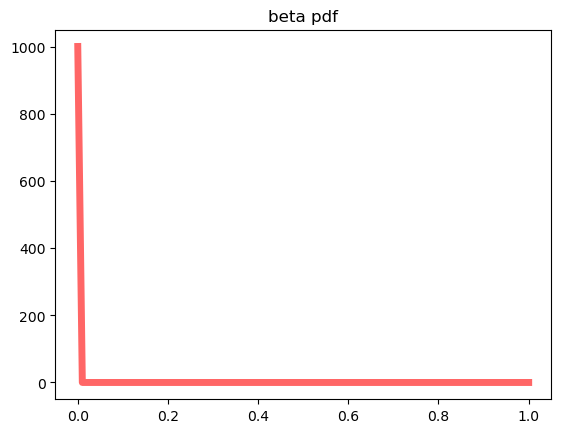

In [174]:
a = test_true_counter +1
b = test_false_counter +1

x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)
#plt.plot(x, beta.pdf(x, b, a), 'r-', lw=5, alpha=0.6)
plt.title('beta pdf')
plt.show()


In [175]:
# the bayes factor of seeing the condition difference_mean < 10e-5 is almost 0 because the distribution peaks at ~0

beta.pdf(0.0, a, b)/beta.pdf(0.0, 1, 1)# this is for the old condition where < 10e-5, which would never happen
# the data are 1001 times more likely to under the hypothesis (what follows is the translation of the numbers into words) that the means are different (because the probability 0 = probability of being the same) than under the hypothesis that the means are the same
# there's very strong evidence for the probability of them being the same is 0
# BF > 100 is extreme evidence
# BF > 30 is very strong evidence
# BF > 10 is strong evidence
# BF > 3 is substantial evidence
# BF > 1 is anecdotal evidence
# BF < 1 is evidence in favor of the null hypothesis

1001.0

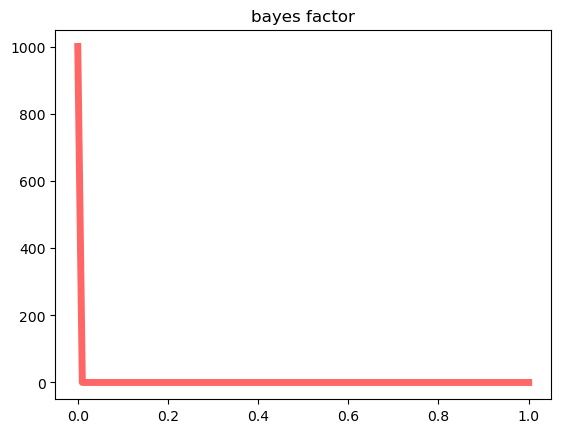

In [176]:
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b)/beta.pdf(x, 1, 1), 'r-', lw=5, alpha=0.6)
#plt.plot(x, beta.pdf(x, b, a), 'r-', lw=5, alpha=0.6)
plt.title('bayes factor')
plt.show()

In [169]:
beta.pdf(0.5, a, b)/beta.pdf(0.5, 1, 1)

9.341968821216811e-299

In [150]:
beta.pdf(0.0, 1, 1)/beta.pdf(0.0, a, b) # in the normal case can't compute with a 0 as the beta is very tight hence the beta value at 0 is very low

0.000999000999000999

In [158]:
total_tests = 1000

in_favour = pd.Series(beta(a,b).rvs() for _ in range(total_tests))
against   = pd.Series(beta(b,a).rvs() for _ in range(total_tests))

against_wins = sum(against > in_favour)
in_favour_wins = sum(in_favour > against)

print('against_wins/total_tests:',against_wins/total_tests, 'in_favour_wins/total_tests:',in_favour_wins/total_tests)

against_wins/total_tests: 1.0 in_favour_wins/total_tests: 0.0


<Axes: >

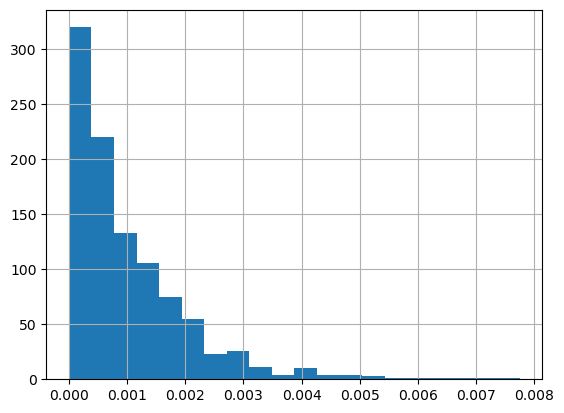

In [162]:
in_favour_relative = in_favour/against
in_favour_relative.hist(bins=20)

<Axes: >

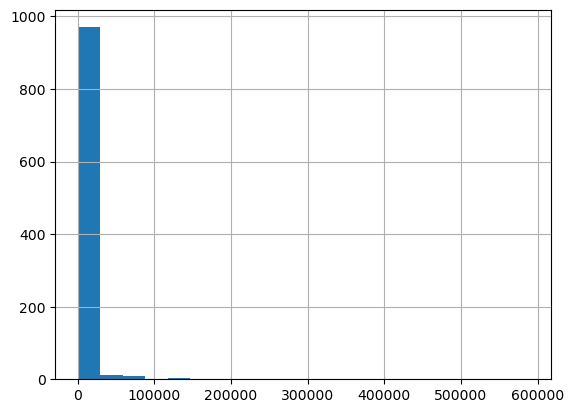

In [163]:
against_relative = against/in_favour
against_relative.hist(bins=20)